## Automobile Price Prediction using Regression models 
### (Batch-10)

### Steps:
     1. Load all Libraries
     2. Load the Dataset
     3. Split the dataset
     4. Fit the model
     5. Make Predictions

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from matplotlib.pyplot import xticks
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
import numpy as np
print('Imported Libraries')

Imported Libraries


### Load Dataset

In [2]:
df = pd.read_csv("E:\ML\dataset\project\dataset\price.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


### Data Preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
df.isnull().sum()
# there are no null values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [8]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [9]:
df['wheelbase'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
98.4     7
Name: wheelbase, dtype: int64

In [10]:
df['carlength'].value_counts().head()

157.3    15
188.8    11
166.3     7
171.7     7
186.7     7
Name: carlength, dtype: int64

In [11]:
df['enginesize'].value_counts().head()

122    15
92     15
98     14
97     14
108    13
Name: enginesize, dtype: int64

In [12]:
df['doornumber'].value_counts().head()

four    115
two      90
Name: doornumber, dtype: int64

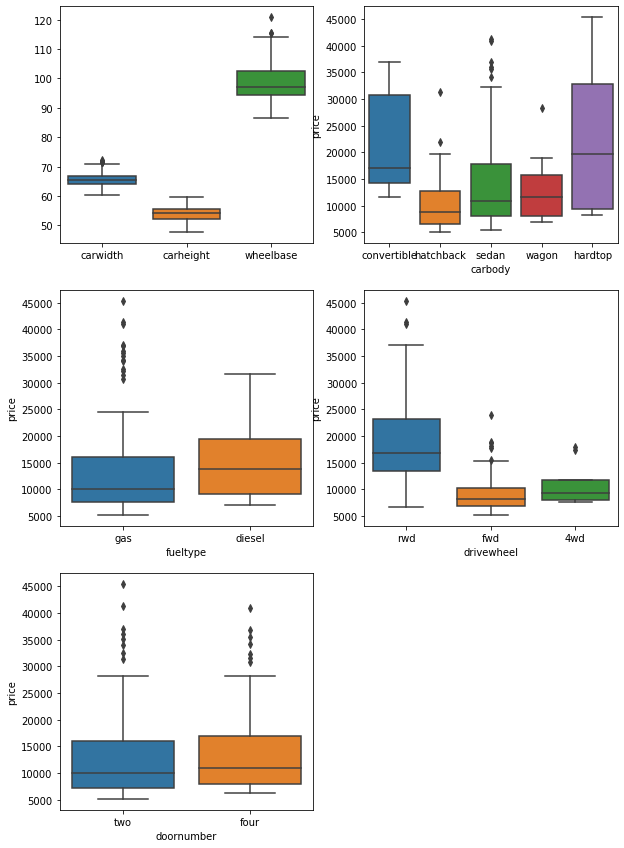

In [13]:
#Boxplot-display the summary of the set of data values having properties like minimum, 
#first quartile, median, third quartile and maximum.

plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
df3=df[['carwidth','carheight','wheelbase']]
sns.boxplot(data=df3)
plt.subplot(4,2,2)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(4,2,3)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(4,2,5)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.show()

In [14]:
df["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [15]:
df['brand'] = df.CarName.str.split(' ').str.get(0).str.upper()
df['brand']

0      ALFA-ROMERO
1      ALFA-ROMERO
2      ALFA-ROMERO
3             AUDI
4             AUDI
          ...     
200          VOLVO
201          VOLVO
202          VOLVO
203          VOLVO
204          VOLVO
Name: brand, Length: 205, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

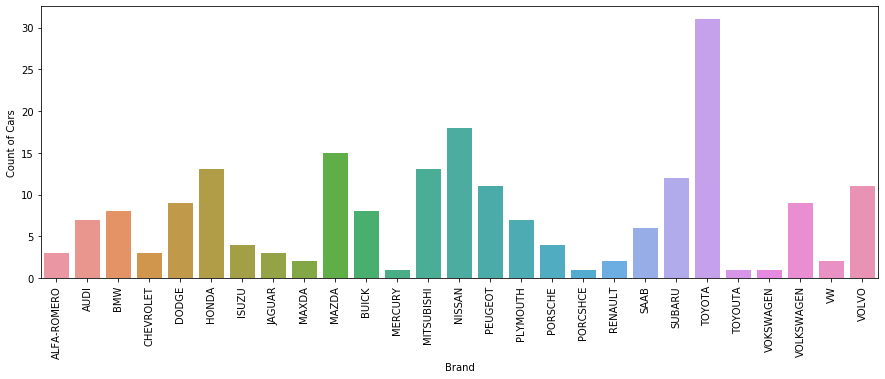

In [16]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(df['brand'], data=df)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
xticks(rotation = 90)

### Converting Categorical to numerical

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int32  
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int32  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int32  
 15  cylindernumber    205 non-null    int32  
 16  enginesize        205 non-null    int64  
 1

In [18]:
df.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,77.209756,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,...,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,13.536585
std,59.322565,1.245307,41.014583,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,...,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,7.417843
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000
25%,52.000000,0.000000,44.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,...,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,7.000000
50%,103.000000,1.000000,80.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,...,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,13.000000
75%,154.000000,2.000000,115.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,...,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,21.000000
max,205.000000,3.000000,146.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,...,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,26.000000


In [19]:
df1=df.head(20)
df1

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,2,1,0,1,0,2,0,88.6,...,5,3.47,2.68,9.0,111,5000,21,27,13495.000,0
1,2,3,3,1,0,1,0,2,0,88.6,...,5,3.47,2.68,9.0,111,5000,21,27,16500.000,0
2,3,1,1,1,0,1,2,2,0,94.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.000,0
3,4,2,4,1,0,0,3,1,0,99.8,...,5,3.19,3.40,10.0,102,5500,24,30,13950.000,1
4,5,2,5,1,0,0,3,0,0,99.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.000,1
5,6,2,9,1,0,1,3,1,0,99.8,...,5,3.19,3.40,8.5,110,5500,19,25,15250.000,1
6,7,1,5,1,0,0,3,1,0,105.8,...,5,3.19,3.40,8.5,110,5500,19,25,17710.000,1
7,8,1,7,1,0,0,4,1,0,105.8,...,5,3.19,3.40,8.5,110,5500,19,25,18920.000,1
8,9,1,6,1,1,0,3,1,0,105.8,...,5,3.13,3.40,8.3,140,5500,17,20,23875.000,1
9,10,0,8,1,1,1,2,0,0,99.5,...,5,3.13,3.40,7.0,160,5500,16,22,17859.167,1


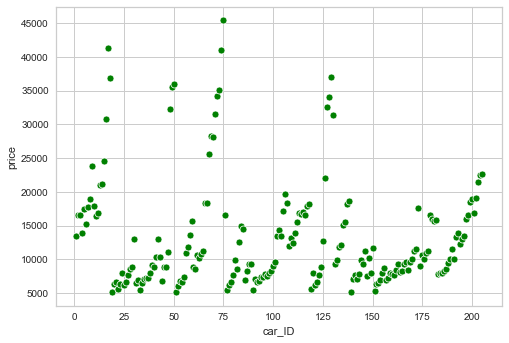

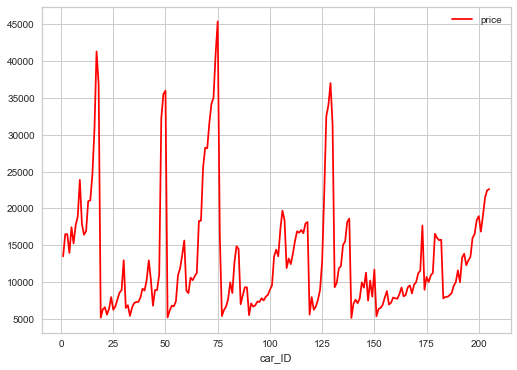

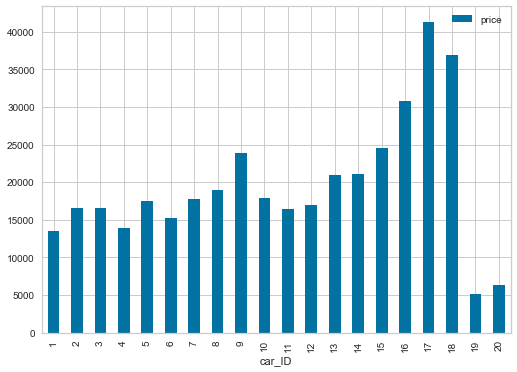

In [66]:

plt1 = sns.scatterplot(x = 'car_ID', y = 'price', data = df,color='green');

df.plot(x='car_ID',y='price',figsize=(8.4,6), color='red',);

df1.plot(x='car_ID',y='price',kind='bar',figsize=(8.4,6));


    symboling
 0         67
 1         54
 2         32
 3         27
-1         22
-2          3


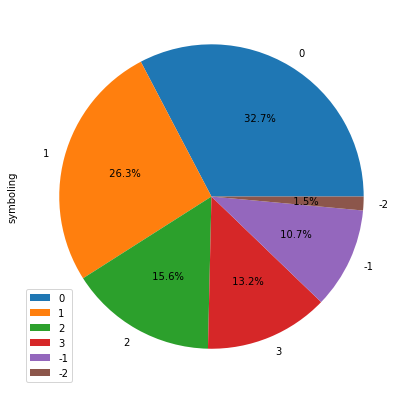

In [21]:
#Its assigned insurance risk rating +3 high risk,-3 low risk
sym = pd.DataFrame(df['symboling'].value_counts())
print(sym)
sym.plot.pie(subplots=True,labels = sym.index.values, autopct='%5.1f%%', figsize = (7,7));

#There are more high risk vehicles

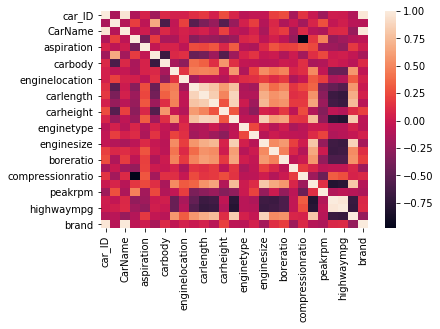

In [22]:
#correlation is a measure of how strongly one variable depends on another.
corr=df.corr()
sns.heatmap(corr)

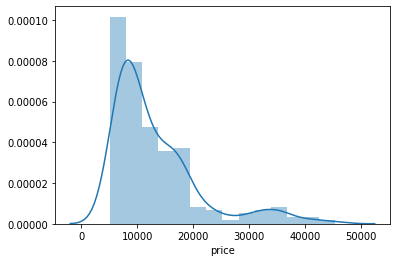

In [23]:
#Target value(Histogram)
sns.distplot(df.price)

In [24]:
x=df.drop('price',axis=1) #independent variable
y=df['price'] #Dependent variable

### Split the dataset

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

# Build the Regression model

## 1. Multiple Linear Regression


In [26]:
from sklearn.linear_model import LinearRegression
R1=LinearRegression()
R1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicted Values

In [27]:
y_pred1=R1.predict(x_test)
print("PredictValues:",y_pred1)

PredictValues: [ 6337.718017    9245.67272797 11095.51633448  8949.43565381
  7466.03237582 12178.78845564 15809.83707067 20095.84953432
 15858.21898828 21645.75791005 17643.24250926 15758.22505031
 19060.52657361 11819.01270301 39193.12004934  6865.01558932
  5489.16529513 13449.22157706 16536.65110517 15393.80880606
 16231.56443862 16182.87347234 34425.27979817  5467.48038844
 13453.32466474 21027.37070854 15604.08679807 27316.85752139
 14976.0232531  13686.82193287  6615.61225698 26872.39812969
 19212.72921957 19150.14515566 17322.11164274 10698.99050979
 15431.51760745 13012.60402687  6576.38155311 10120.47618787
 38515.85673178 14630.48502474  6209.62320389  9244.6053136
  6938.72937037 10890.25993461  7306.83813538 10193.23042643
  8136.86922466  8403.0036677   6423.0199223  13611.18920485
  6305.29331613 10173.26722007 20798.2066489   6360.06689424
 11499.745442   12896.74444303 15908.94849791  8136.73285003
  8790.65788407 34713.8129107 ]


### Intercept and Coeff Values

In [28]:
print('The intercept value is ',R1.intercept_)
print()
print('The coeff values are',R1.coef_)


The intercept value is  -78199.22006249016

The coeff values are [ 3.93505149e+01  1.96630219e+02 -1.88376255e+01  4.07742587e+03
  4.24290820e+02 -3.85728894e+02 -4.80781887e+02  6.46133799e+02
  1.16824524e+04  8.88221522e+01 -4.91290508e+01  7.21695634e+02
  3.13292967e+02  3.33733827e+00  7.47837112e+01  5.72864877e+02
  6.77794263e+01  1.56911294e+02  3.34786270e+02 -1.94600051e+03
  3.51319196e+02  2.50917623e+01  9.03456495e-01 -9.75778257e+01
  1.33419974e+02 -3.98955062e+02]


### The Actual Values vs Predicted Values

In [29]:
pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred1})

,Actual Values,Predicted Values
160,7738.0,6337.718017
186,8495.0,9245.672728
59,8845.0,11095.516334
165,9298.0,8949.435654
140,7603.0,7466.032376
...,...,...
28,8921.0,12896.744443
29,12964.0,15908.948498
182,7775.0,8136.732850
40,10295.0,8790.657884


### Root mean square error 

In [30]:
ms1=np.sqrt(mean_squared_error(y_test,y_pred1))
print('RMSE is ',ms1)

RMSE is  2447.942591346966


### Score for the model

In [75]:
r1=R1.score(x_test,y_test)
print("r^2 score for Multiple regression for testing:",r1)


r^2 score for Multiple regression for testing: 0.9144295266645337


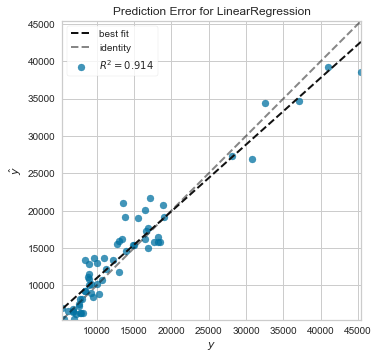

In [32]:
from yellowbrick.regressor import PredictionError

'''A prediction error plot shows the actual targets from the dataset 
   against the predicted values generated by our model.
'''
visualizer = PredictionError(R1)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof() ;

## 2. Decision Tree Regression

In [33]:
from sklearn.tree import DecisionTreeRegressor
R2=DecisionTreeRegressor()
R2.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### Predicted Values

In [34]:
y_pred2=R2.predict(x_test)
y_pred2

array([ 9258.,  8195., 10595.,  9538.,  7053.,  8495., 18950., 21105.,
       11549., 19699., 22470., 18620., 16695.,  8845., 34184.,  7129.,
        9258., 11850., 21105., 12629., 15985., 15985., 34028.,  5389.,
       11199., 14399., 16500., 25552., 16430., 11900.,  6669., 41315.,
       17950., 22470., 11900., 10795., 11850., 11199.,  7299., 10245.,
       34184., 16430.,  8358.,  9980.,  6479.,  9549.,  6692.,  9279.,
        7788.,  7788.,  6095., 11199.,  8058.,  8189., 17710.,  7788.,
       18344., 18344., 12629.,  7788.,  8845., 34028.])

### The Actual Values vs Predicted Values

In [35]:
pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred2})

,Actual Values,Predicted Values
160,7738.0,9258.0
186,8495.0,8195.0
59,8845.0,10595.0
165,9298.0,9538.0
140,7603.0,7053.0
...,...,...
28,8921.0,18344.0
29,12964.0,12629.0
182,7775.0,7788.0
40,10295.0,8845.0


### Root mean square error 

In [36]:
ms2=np.sqrt(mean_squared_error(y_test,y_pred2))
print('RMSE is ',ms2)

RMSE is  3467.8313875184394


### Score for the model

In [72]:
r2=R2.score(x_test,y_test)
print("r^2 score for Decision Tree regressor for testing:",r2)


r^2 score for Decision Tree regressor for testing: 0.8282734585795191


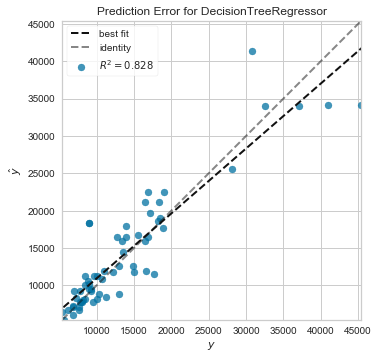

In [38]:
visualizer = PredictionError(R2)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof() ;

## 3. Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
R3=RandomForestRegressor()
R3.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Predicted Values

In [40]:
y_pred3=R3.predict(x_test)
y_pred3

array([ 7845.69   ,  8948.73   ,  9662.96   ,  9596.31   ,  7498.49   ,
       10192.65   , 18088.18334, 18174.63336, 13287.92167, 18374.96   ,
       19504.79167, 17757.53167, 14165.1    , 11223.47   , 34332.135  ,
        6819.045  ,  7974.535  , 14314.52   , 16404.07   , 14452.53167,
       15299.05   , 16085.67   , 31250.965  ,  5860.775  , 11756.98   ,
       14815.39   , 14697.67167, 27175.18834, 13781.51   , 12999.56167,
        6235.26   , 35871.48167, 17382.25   , 20727.37501, 13700.01   ,
       10947.2    , 14635.84   , 11835.35   ,  7068.65   , 10203.11   ,
       35193.855  , 11617.25   ,  7881.83   ,  8227.13   ,  6097.26   ,
        9416.93   ,  6695.3    ,  9564.83   ,  8253.855  ,  8693.335  ,
        5973.255  , 11769.64   ,  8040.43   , 10270.79   , 19926.89167,
        8083.92   , 11392.19   , 12682.28   , 15088.42835,  8221.315  ,
        9275.965  , 31302.365  ])

### The Actual Values vs Predicted Values

In [41]:
pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred3})

,Actual Values,Predicted Values
160,7738.0,7845.69000
186,8495.0,8948.73000
59,8845.0,9662.96000
165,9298.0,9596.31000
140,7603.0,7498.49000
...,...,...
28,8921.0,12682.28000
29,12964.0,15088.42835
182,7775.0,8221.31500
40,10295.0,9275.96500


### Root mean square error 

In [42]:
ms3=np.sqrt(mean_squared_error(y_test,y_pred3))
print('RMSE is ',ms3)

RMSE is  2411.2505468363215


### Score for the model

In [70]:
r3=R3.score(x_test,y_test)
print("r^2 score for RandomForestRegressor for testing:",r3)


r^2 score for RandomForestRegressor for testing: 0.9169755216858728


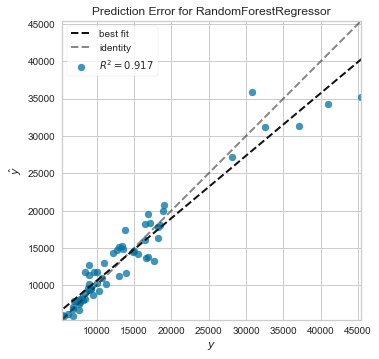

In [44]:
visualizer = PredictionError(R3)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof() ;

## 4. Ridge Regressor

In [45]:
from sklearn.linear_model import Ridge
R4 = Ridge(alpha=0.01)
R4.fit(x_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### Predicted Values

In [46]:
y_pred4=R4.predict(x_test)
y_pred4

array([ 6351.5356953 ,  9249.32642024, 11097.30478539,  8962.45161113,
        7471.11026756, 12187.15822245, 15832.2065654 , 20096.54103683,
       15843.49585735, 21660.38847656, 17627.91643351, 15749.11725679,
       19066.67590985, 11810.57864984, 39215.89188713,  6873.22891401,
        5495.92706634, 13444.34589235, 16550.40646704, 15398.98570782,
       16218.62181992, 16169.67807411, 34310.46189332,  5466.2893685 ,
       13445.8697097 , 21038.35226979, 15619.72741513, 27316.29623808,
       14985.17160132, 13650.22668565,  6608.8041099 , 26919.06513728,
       19210.8842874 , 19140.09042641, 17310.44164444, 10685.48596988,
       15451.80761915, 13001.61387122,  6575.34526278, 10111.0266675 ,
       38548.01555294, 14594.09497892,  6219.40387736,  9252.00878273,
        6912.43886521, 10915.60735919,  7295.43948669, 10227.28044398,
        8150.36196329,  8388.07033774,  6424.12037956, 13604.52146264,
        6312.55014269, 10156.02750015, 20785.10272361,  6371.27479894,
      

### The Actual Values vs Predicted Values

In [47]:
pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred4})

,Actual Values,Predicted Values
160,7738.0,6351.535695
186,8495.0,9249.326420
59,8845.0,11097.304785
165,9298.0,8962.451611
140,7603.0,7471.110268
...,...,...
28,8921.0,12896.199127
29,12964.0,15917.507638
182,7775.0,8145.775852
40,10295.0,8799.510490


### Root mean square error 

In [61]:
ms4=np.sqrt(mean_squared_error(y_test,y_pred4))
print('RMSE is ',ms4)

RMSE is  2444.75556590593


### Score for the model

In [68]:
r4=R4.score(x_test,y_test)
print("r^2 score for Ridge Regressor for testing:",r4)


r^2 score for Ridge Regressor for testing: 0.914652193445812


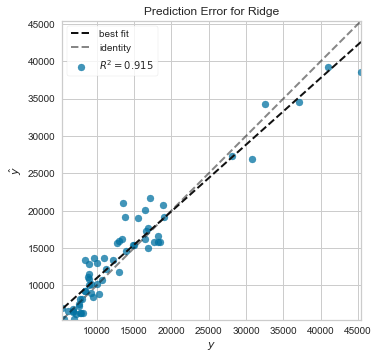

In [50]:
visualizer = PredictionError(R4)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof() ;

In [51]:
model=['Multiple Linear Regression','Decision Tree Regression','Random Forest Regressor','Ridge Regression']
rmse=[ms1,ms2,ms3,ms4]
r2score=[r1,r2,r3,r4]
table=pd.DataFrame(data=zip(model,rmse,r2score),columns=['Model','RSME Value','R2 Score'])
table

,Model,RSME Value,R2 Score
0,Multiple Linear Regression,2447.942591,0.914430
1,Decision Tree Regression,3467.831388,0.828273
2,Random Forest Regressor,2411.250547,0.916976
3,Ridge Regression,2444.755566,0.914652


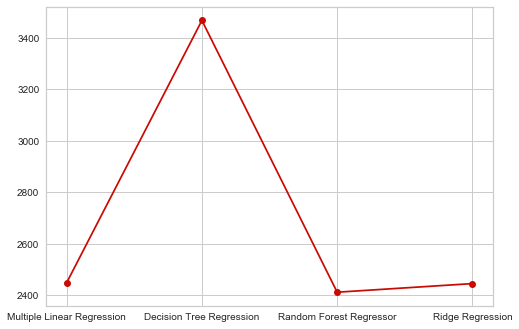

In [52]:
plt.plot(model,rmse,'ro-')

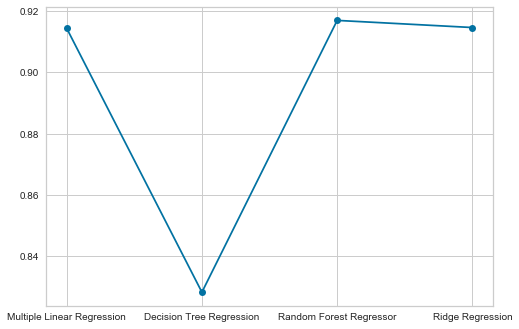

In [53]:
plt.plot(model,r2score,'bo-')

Decision Tree Regression has Maximum Rmse value 3467.8313875184394



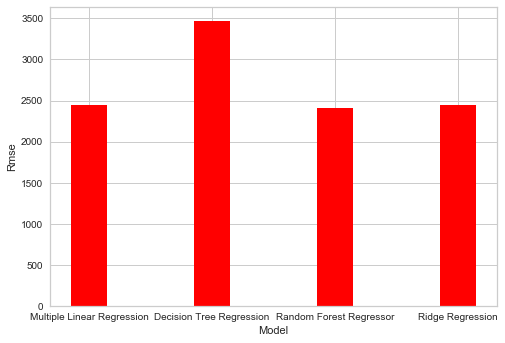

In [54]:
plt.bar(model,rmse,width=0.298,color='red')
plt.xlabel('Model')
plt.ylabel('Rmse');

print('Decision Tree Regression has Maximum Rmse value',ms2)
print()

Random Forest Regression has Maximum R2 Score value 0.9169755216858728



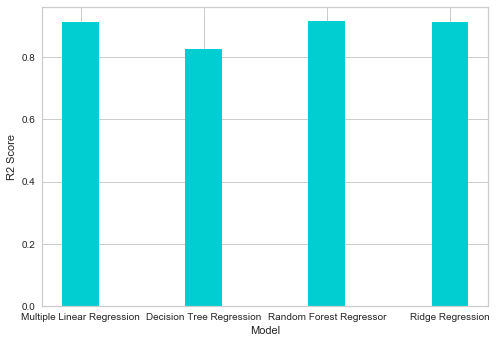

In [55]:
plt.bar(model,r2score,width=0.298,color='darkturquoise')
plt.xlabel('Model')
plt.ylabel('R2 Score');

print('Random Forest Regression has Maximum R2 Score value',r3)
print()